In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [348]:
movie=pd.read_csv('movie_metadata.csv')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0


Мы имеем датасет по фильмам с исчерпывающей информацией, но не всегда полной, приступим к разведательному анализу данных, посмотрим структуры, типы данных

In [349]:
movie.shape

(5043, 28)

In [350]:
movie.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                        object
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

Заменим значение в колонке бюджет, что бы можно было проводить статистическую аналитику, лишний символ мешает нам это сделать

In [351]:
def change_form_of_value(Value):
    change = Value.replace("$", "")
    return change
movie['budget']= movie['budget'].apply(lambda x: change_form_of_value(x))
movie['budget'] = movie['budget'].astype("float")

In [352]:
movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,0.0,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,0.0,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660


In [353]:
movie.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,5.043000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.587432e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,1.961555e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,3.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,1.500000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.000000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


#### Для дальнейшего анализа создадим колонку с категориями фильмов. На основе описания (describe) дата фрейма мы видим по колонке длительности фильма (duration) распределение по квартилям (93,103,118) 

In [354]:
movie=movie.fillna({'duration':movie.duration.mean()})

In [355]:
def change_form_of_duration(duration):
    if duration < 93 :
        duration_metrix = 'short_films'
    elif 93 <= duration <=103:
        duration_metrix = 'medium_movies'
    else:
        duration_metrix = 'long_films'
    return duration_metrix

В колонке duration есть пропущенные значения, мы заменим пропуски на среднее значение

In [356]:
movie['movie_duration_category']=movie['duration'].apply(lambda x: change_form_of_duration(x))

In [357]:
movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,movie_duration_category
0,Color,James Cameron,723.0,178.000000,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,long_films
1,Color,Gore Verbinski,302.0,169.000000,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,long_films
2,Color,Sam Mendes,602.0,148.000000,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,long_films
3,Color,Christopher Nolan,813.0,164.000000,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,long_films
4,NaN,Doug Walker,NaN,107.201074,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,0.0,NaN,12.0,7.1,NaN,0,long_films
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.000000,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,English,Canada,NaN,0.0,2013.0,470.0,7.7,NaN,84,short_films
5039,Color,NaN,43.0,43.000000,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,English,USA,TV-14,0.0,NaN,593.0,7.5,16.00,32000,short_films
5040,Color,Benjamin Roberds,13.0,76.000000,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,short_films
5041,Color,Daniel Hsia,14.0,100.000000,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660,medium_movies


In [358]:
movie.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                       0
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                         0
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
movie_duration_category        0
dtype: int64

In [359]:
movie.duration.mean()

107.20107398568017

Далее перед очисткой датафрейма от строк, по которым отсутствуем информация приведем к среднему значения некоторых столбцом, там где пропуски

In [360]:
movie=movie.fillna({'gross':movie.gross.mean()})
movie=movie.fillna({'director_facebook_likes':movie.director_facebook_likes.mean()})
movie=movie.fillna({'budget':movie.budget.mean()})
movie=movie.fillna({'movie_facebook_likes':movie.movie_facebook_likes.mean()})
movie=movie.fillna({'imdb_score':movie.imdb_score.mean()})

In [361]:
movie.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                       0
director_facebook_likes        0
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                         0
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
movie_duration_category        0
dtype: int64

In [362]:
movie.shape

(5043, 29)

В рамках дальнейшей обработки данного датасета проведем очистку строк и стобцом, там где нет значений и колонки, которые в рамках такущего подхода к датасету решено исключить

In [363]:
movie_short_df = movie.drop(['plot_keywords','actor_3_name','actor_2_name', 'actor_3_facebook_likes','actor_2_facebook_likes'], axis='columns')


In [364]:
movie_short_df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                       0
director_facebook_likes        0
actor_1_facebook_likes         7
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                         0
title_year                   108
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
movie_duration_category        0
dtype: int64

In [365]:
df = movie_short_df.dropna(axis=0)

In [366]:
df.shape

(4456, 24)

Далее выделим жанры фильма, точнее преобразуем формат, для того чтобы можно было провести группировку по жанрам

In [367]:
df['genres'].str.split('|')

0            [Action, Adventure, Fantasy, Sci-Fi]
1                    [Action, Adventure, Fantasy]
2                   [Action, Adventure, Thriller]
3                              [Action, Thriller]
5                     [Action, Adventure, Sci-Fi]
                          ...                    
5027                                      [Drama]
5033                    [Drama, Sci-Fi, Thriller]
5035    [Action, Crime, Drama, Romance, Thriller]
5041                     [Comedy, Drama, Romance]
5042                                [Documentary]
Name: genres, Length: 4456, dtype: object

In [368]:
new_df = df['genres'].str.split('|',expand=True)
new_df

,0,1,2,3,4,5,6,7
0,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Action,Adventure,Fantasy,None,None,None,None,None
2,Action,Adventure,Thriller,None,None,None,None,None
3,Action,Thriller,None,None,None,None,None,None
5,Action,Adventure,Sci-Fi,None,None,None,None,None
...,...,...,...,...,...,...,...,...
5027,Drama,None,None,None,None,None,None,None
5033,Drama,Sci-Fi,Thriller,None,None,None,None,None
5035,Action,Crime,Drama,Romance,Thriller,None,None,None
5041,Comedy,Drama,Romance,None,None,None,None,None


In [369]:
movie_genres = pd.concat([df,new_df],axis=1)
movie_genres

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,...,movie_facebook_likes,movie_duration_category,0,1,2,3,4,5,6,7
0,Color,James Cameron,723.0,178.0,0.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,33000,long_films,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Color,Gore Verbinski,302.0,169.0,563.0,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,0,long_films,Action,Adventure,Fantasy,None,None,None,None,None
2,Color,Sam Mendes,602.0,148.0,0.0,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,85000,long_films,Action,Adventure,Thriller,None,None,None,None,None
3,Color,Christopher Nolan,813.0,164.0,22000.0,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,...,164000,long_films,Action,Thriller,None,None,None,None,None,None
5,Color,Andrew Stanton,462.0,132.0,475.0,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,...,24000,long_films,Action,Adventure,Sci-Fi,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,Color,Jafar Panahi,64.0,90.0,397.0,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,The Circle,...,697,short_films,Drama,None,None,None,None,None,None,None
5033,Color,Shane Carruth,143.0,77.0,291.0,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,...,19000,short_films,Drama,Sci-Fi,Thriller,None,None,None,None,None
5035,Color,Robert Rodriguez,56.0,81.0,0.0,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,...,0,short_films,Action,Crime,Drama,Romance,Thriller,None,None,None
5041,Color,Daniel Hsia,14.0,100.0,0.0,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,...,660,medium_movies,Comedy,Drama,Romance,None,None,None,None,None


In [370]:
movie_genres.columns

Index([                    'color',             'director_name',
          'num_critic_for_reviews',                  'duration',
         'director_facebook_likes',    'actor_1_facebook_likes',
                           'gross',                    'genres',
                    'actor_1_name',               'movie_title',
                 'num_voted_users', 'cast_total_facebook_likes',
            'facenumber_in_poster',           'movie_imdb_link',
            'num_user_for_reviews',                  'language',
                         'country',            'content_rating',
                          'budget',                'title_year',
                      'imdb_score',              'aspect_ratio',
            'movie_facebook_likes',   'movie_duration_category',
                                 0,                           1,
                                 2,                           3,
                                 4,                           5,
                         

In [371]:
movie_genres = movie_genres.rename(columns={0:'genres_1',
                                            1:'genres_2',
                                            2:'genres_3',
                                            3:'genres_4',
                                            4:'genres_5',
                                            5:'genres_6',
                                            6:'genres_7',
                                            7:'genres_8'})

In [372]:
movie_genres

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,...,movie_facebook_likes,movie_duration_category,genres_1,genres_2,genres_3,genres_4,genres_5,genres_6,genres_7,genres_8
0,Color,James Cameron,723.0,178.0,0.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,...,33000,long_films,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Color,Gore Verbinski,302.0,169.0,563.0,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,...,0,long_films,Action,Adventure,Fantasy,None,None,None,None,None
2,Color,Sam Mendes,602.0,148.0,0.0,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,...,85000,long_films,Action,Adventure,Thriller,None,None,None,None,None
3,Color,Christopher Nolan,813.0,164.0,22000.0,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,...,164000,long_films,Action,Thriller,None,None,None,None,None,None
5,Color,Andrew Stanton,462.0,132.0,475.0,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,...,24000,long_films,Action,Adventure,Sci-Fi,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,Color,Jafar Panahi,64.0,90.0,397.0,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,The Circle,...,697,short_films,Drama,None,None,None,None,None,None,None
5033,Color,Shane Carruth,143.0,77.0,291.0,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,...,19000,short_films,Drama,Sci-Fi,Thriller,None,None,None,None,None
5035,Color,Robert Rodriguez,56.0,81.0,0.0,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,...,0,short_films,Action,Crime,Drama,Romance,Thriller,None,None,None
5041,Color,Daniel Hsia,14.0,100.0,0.0,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,...,660,medium_movies,Comedy,Drama,Romance,None,None,None,None,None


In [373]:
movie_genres= movie_genres.drop(['genres_4','genres_5','genres_6','genres_7','genres_8','genres'], axis='columns')

In [374]:
movie_genres

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,...,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,movie_duration_category,genres_1,genres_2,genres_3
0,Color,James Cameron,723.0,178.0,0.0,1000.0,760505847.0,CCH Pounder,Avatar,886204,...,PG-13,237000000.0,2009.0,7.9,1.78,33000,long_films,Action,Adventure,Fantasy
1,Color,Gore Verbinski,302.0,169.0,563.0,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,...,PG-13,300000000.0,2007.0,7.1,2.35,0,long_films,Action,Adventure,Fantasy
2,Color,Sam Mendes,602.0,148.0,0.0,11000.0,200074175.0,Christoph Waltz,Spectre,275868,...,PG-13,245000000.0,2015.0,6.8,2.35,85000,long_films,Action,Adventure,Thriller
3,Color,Christopher Nolan,813.0,164.0,22000.0,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,...,PG-13,250000000.0,2012.0,8.5,2.35,164000,long_films,Action,Thriller,None
5,Color,Andrew Stanton,462.0,132.0,475.0,640.0,73058679.0,Daryl Sabara,John Carter,212204,...,PG-13,263700000.0,2012.0,6.6,2.35,24000,long_films,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,Color,Jafar Panahi,64.0,90.0,397.0,5.0,673780.0,Fereshteh Sadre Orafaiy,The Circle,4555,...,Not Rated,10000.0,2000.0,7.5,1.85,697,short_films,Drama,None,None
5033,Color,Shane Carruth,143.0,77.0,291.0,291.0,424760.0,Shane Carruth,Primer,72639,...,PG-13,7000.0,2004.0,7.0,1.85,19000,short_films,Drama,Sci-Fi,Thriller
5035,Color,Robert Rodriguez,56.0,81.0,0.0,121.0,2040920.0,Carlos Gallardo,El Mariachi,52055,...,R,7000.0,1992.0,6.9,1.37,0,short_films,Action,Crime,Drama
5041,Color,Daniel Hsia,14.0,100.0,0.0,946.0,10443.0,Alan Ruck,Shanghai Calling,1255,...,PG-13,0.0,2012.0,6.3,2.35,660,medium_movies,Comedy,Drama,Romance


In [375]:
movie_genres.shape

(4456, 26)

In [376]:
movie_genres.isnull().sum()

color                           0
director_name                   0
num_critic_for_reviews          0
duration                        0
director_facebook_likes         0
actor_1_facebook_likes          0
gross                           0
actor_1_name                    0
movie_title                     0
num_voted_users                 0
cast_total_facebook_likes       0
facenumber_in_poster            0
movie_imdb_link                 0
num_user_for_reviews            0
language                        0
country                         0
content_rating                  0
budget                          0
title_year                      0
imdb_score                      0
aspect_ratio                    0
movie_facebook_likes            0
movie_duration_category         0
genres_1                        0
genres_2                      473
genres_3                     1653
dtype: int64

### Приступаем к визуализации анализа данных

Text(0.5, 1.0, 'Распределение рейтинговых возрастов')

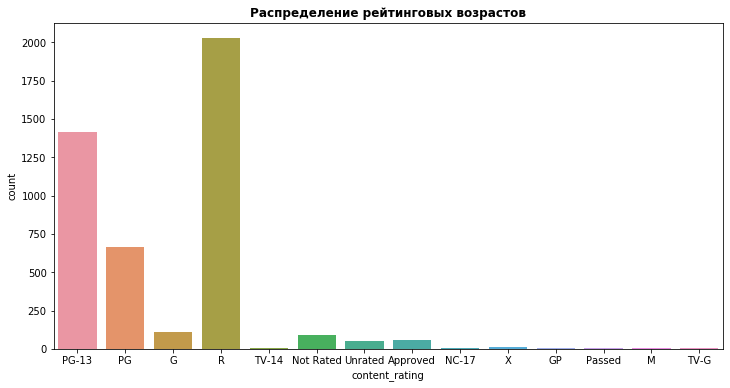

In [377]:
plt.subplots(figsize=(12,6))
sns.countplot(x=movie_genres["content_rating"])
plt.title("Распределение рейтинговых возрастов", fontweight="bold")

Text(0.5, 1.0, 'Распределение по категориям фильмов по длине')

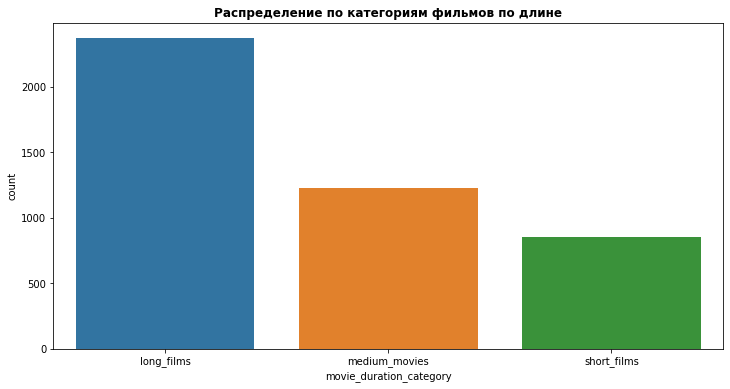

In [378]:
plt.subplots(figsize=(12,6))
sns.countplot(x=movie_genres["movie_duration_category"])
plt.title("Распределение по категориям фильмов по длине", fontweight="bold")

Text(0.5, 1.0, 'Распределение по основному жанру фильма')

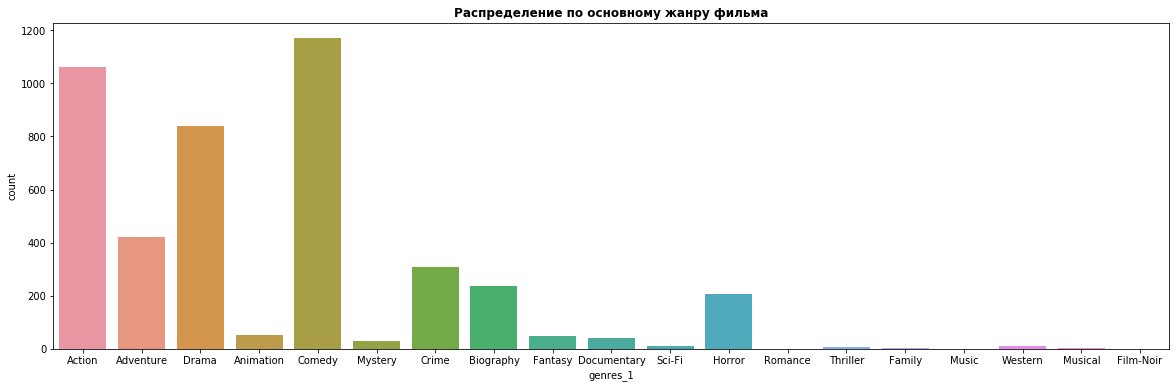

In [379]:
plt.subplots(figsize=(20,6))
sns.countplot(x=movie_genres["genres_1"])
plt.title("Распределение по основному жанру фильма", fontweight="bold")

Далее созданим датафрейм только с количественными значениями, для вычисления взаимосвязи между факторами

In [380]:
movie_genres.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'movie_duration_category', 'genres_1',
       'genres_2', 'genres_3'],
      dtype='object')

In [381]:
df_1= movie_genres.drop(['color','director_name','actor_1_name','movie_imdb_link','movie_duration_category'], axis='columns')

In [382]:
df_1

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,genres_1,genres_2,genres_3
0,723.0,178.0,0.0,1000.0,760505847.0,Avatar,886204,4834,0.0,3054.0,...,USA,PG-13,237000000.0,2009.0,7.9,1.78,33000,Action,Adventure,Fantasy
1,302.0,169.0,563.0,40000.0,309404152.0,Pirates of the Caribbean: At World's End,471220,48350,0.0,1238.0,...,USA,PG-13,300000000.0,2007.0,7.1,2.35,0,Action,Adventure,Fantasy
2,602.0,148.0,0.0,11000.0,200074175.0,Spectre,275868,11700,1.0,994.0,...,UK,PG-13,245000000.0,2015.0,6.8,2.35,85000,Action,Adventure,Thriller
3,813.0,164.0,22000.0,27000.0,448130642.0,The Dark Knight Rises,1144337,106759,0.0,2701.0,...,USA,PG-13,250000000.0,2012.0,8.5,2.35,164000,Action,Thriller,None
5,462.0,132.0,475.0,640.0,73058679.0,John Carter,212204,1873,1.0,738.0,...,USA,PG-13,263700000.0,2012.0,6.6,2.35,24000,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,64.0,90.0,397.0,5.0,673780.0,The Circle,4555,5,0.0,26.0,...,Iran,Not Rated,10000.0,2000.0,7.5,1.85,697,Drama,None,None
5033,143.0,77.0,291.0,291.0,424760.0,Primer,72639,368,0.0,371.0,...,USA,PG-13,7000.0,2004.0,7.0,1.85,19000,Drama,Sci-Fi,Thriller
5035,56.0,81.0,0.0,121.0,2040920.0,El Mariachi,52055,147,0.0,130.0,...,USA,R,7000.0,1992.0,6.9,1.37,0,Action,Crime,Drama
5041,14.0,100.0,0.0,946.0,10443.0,Shanghai Calling,1255,2386,5.0,9.0,...,USA,PG-13,0.0,2012.0,6.3,2.35,660,Comedy,Drama,Romance


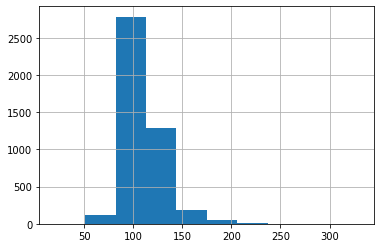

In [383]:
df_1.duration.hist()

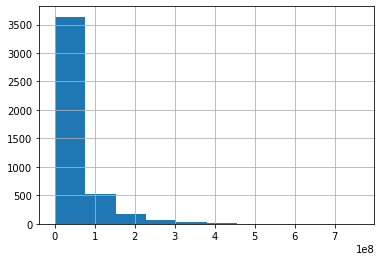

In [384]:
df_1.gross.hist()

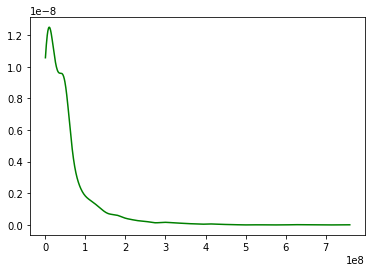

In [385]:
from scipy.stats.kde import gaussian_kde

from numpy import linspace,hstack
from pylab import plot,show,hist
my_density = gaussian_kde(df_1['gross'])
x = linspace(min(df_1['gross']), max(df_1['gross']),1000)
plot(x, my_density(x),'g') # distribution function

Text(0, 0.5, 'Сумма')

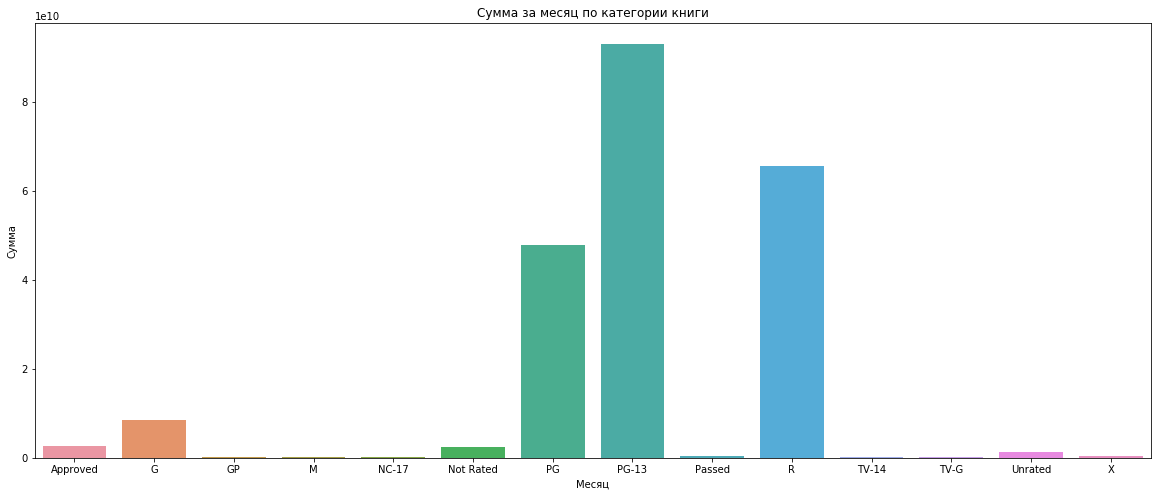

In [386]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x=df_1.groupby('content_rating').gross.sum().index, 
                 y=df_1.groupby('content_rating').gross.sum().values, data=df_1)
ax.set_title('Сумма за месяц по категории книги')
ax.set_xlabel('Месяц')
ax.set_ylabel('Сумма')


In [387]:
df_1

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,genres_1,genres_2,genres_3
0,723.0,178.0,0.0,1000.0,760505847.0,Avatar,886204,4834,0.0,3054.0,...,USA,PG-13,237000000.0,2009.0,7.9,1.78,33000,Action,Adventure,Fantasy
1,302.0,169.0,563.0,40000.0,309404152.0,Pirates of the Caribbean: At World's End,471220,48350,0.0,1238.0,...,USA,PG-13,300000000.0,2007.0,7.1,2.35,0,Action,Adventure,Fantasy
2,602.0,148.0,0.0,11000.0,200074175.0,Spectre,275868,11700,1.0,994.0,...,UK,PG-13,245000000.0,2015.0,6.8,2.35,85000,Action,Adventure,Thriller
3,813.0,164.0,22000.0,27000.0,448130642.0,The Dark Knight Rises,1144337,106759,0.0,2701.0,...,USA,PG-13,250000000.0,2012.0,8.5,2.35,164000,Action,Thriller,None
5,462.0,132.0,475.0,640.0,73058679.0,John Carter,212204,1873,1.0,738.0,...,USA,PG-13,263700000.0,2012.0,6.6,2.35,24000,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,64.0,90.0,397.0,5.0,673780.0,The Circle,4555,5,0.0,26.0,...,Iran,Not Rated,10000.0,2000.0,7.5,1.85,697,Drama,None,None
5033,143.0,77.0,291.0,291.0,424760.0,Primer,72639,368,0.0,371.0,...,USA,PG-13,7000.0,2004.0,7.0,1.85,19000,Drama,Sci-Fi,Thriller
5035,56.0,81.0,0.0,121.0,2040920.0,El Mariachi,52055,147,0.0,130.0,...,USA,R,7000.0,1992.0,6.9,1.37,0,Action,Crime,Drama
5041,14.0,100.0,0.0,946.0,10443.0,Shanghai Calling,1255,2386,5.0,9.0,...,USA,PG-13,0.0,2012.0,6.3,2.35,660,Comedy,Drama,Romance


In [388]:
frame=df_1.drop(['movie_title','country','genres_2','genres_3','language','title_year','aspect_ratio'], axis='columns')
frame.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,imdb_score,movie_facebook_likes,genres_1
0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,0.0,3054.0,PG-13,237000000.0,7.9,33000,Action
1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,0.0,1238.0,PG-13,300000000.0,7.1,0,Action
2,602.0,148.0,0.0,11000.0,200074175.0,275868,11700,1.0,994.0,PG-13,245000000.0,6.8,85000,Action
3,813.0,164.0,22000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,PG-13,250000000.0,8.5,164000,Action
5,462.0,132.0,475.0,640.0,73058679.0,212204,1873,1.0,738.0,PG-13,263700000.0,6.6,24000,Action


In [389]:
frame.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,imdb_score,movie_facebook_likes
num_critic_for_reviews,1.000000,0.230771,0.170959,0.186251,0.448319,0.606979,0.256774,-0.028424,0.583733,0.115745,0.332410,0.691796
duration,0.230771,1.000000,0.174747,0.089241,0.237758,0.335460,0.125433,0.026000,0.346401,0.072041,0.361970,0.209187
director_facebook_likes,0.170959,0.174747,1.000000,0.092683,0.136403,0.292118,0.119975,-0.042440,0.214441,0.020574,0.181202,0.157975
actor_1_facebook_likes,0.186251,0.089241,0.092683,1.000000,0.146055,0.193408,0.946804,0.058671,0.140055,0.023782,0.085561,0.137907
gross,0.448319,0.237758,0.136403,0.146055,1.000000,0.618392,0.236703,-0.027071,0.540885,0.105167,0.186094,0.363918
num_voted_users,0.606979,0.335460,0.292118,0.193408,0.618392,1.000000,0.264115,-0.024329,0.789428,0.077945,0.446867,0.526672
cast_total_facebook_likes,0.256774,0.125433,0.119975,0.946804,0.236703,0.264115,1.000000,0.082374,0.198586,0.037543,0.095674,0.212472
facenumber_in_poster,-0.028424,0.026000,-0.042440,0.058671,-0.027071,-0.024329,0.082374,1.000000,-0.070059,-0.018049,-0.071236,0.011793
num_user_for_reviews,0.583733,0.346401,0.214441,0.140055,0.540885,0.789428,0.198586,-0.070059,1.000000,0.082504,0.311840,0.385552
budget,0.115745,0.072041,0.020574,0.023782,0.105167,0.077945,0.037543,-0.018049,0.082504,1.000000,0.027528,0.059825


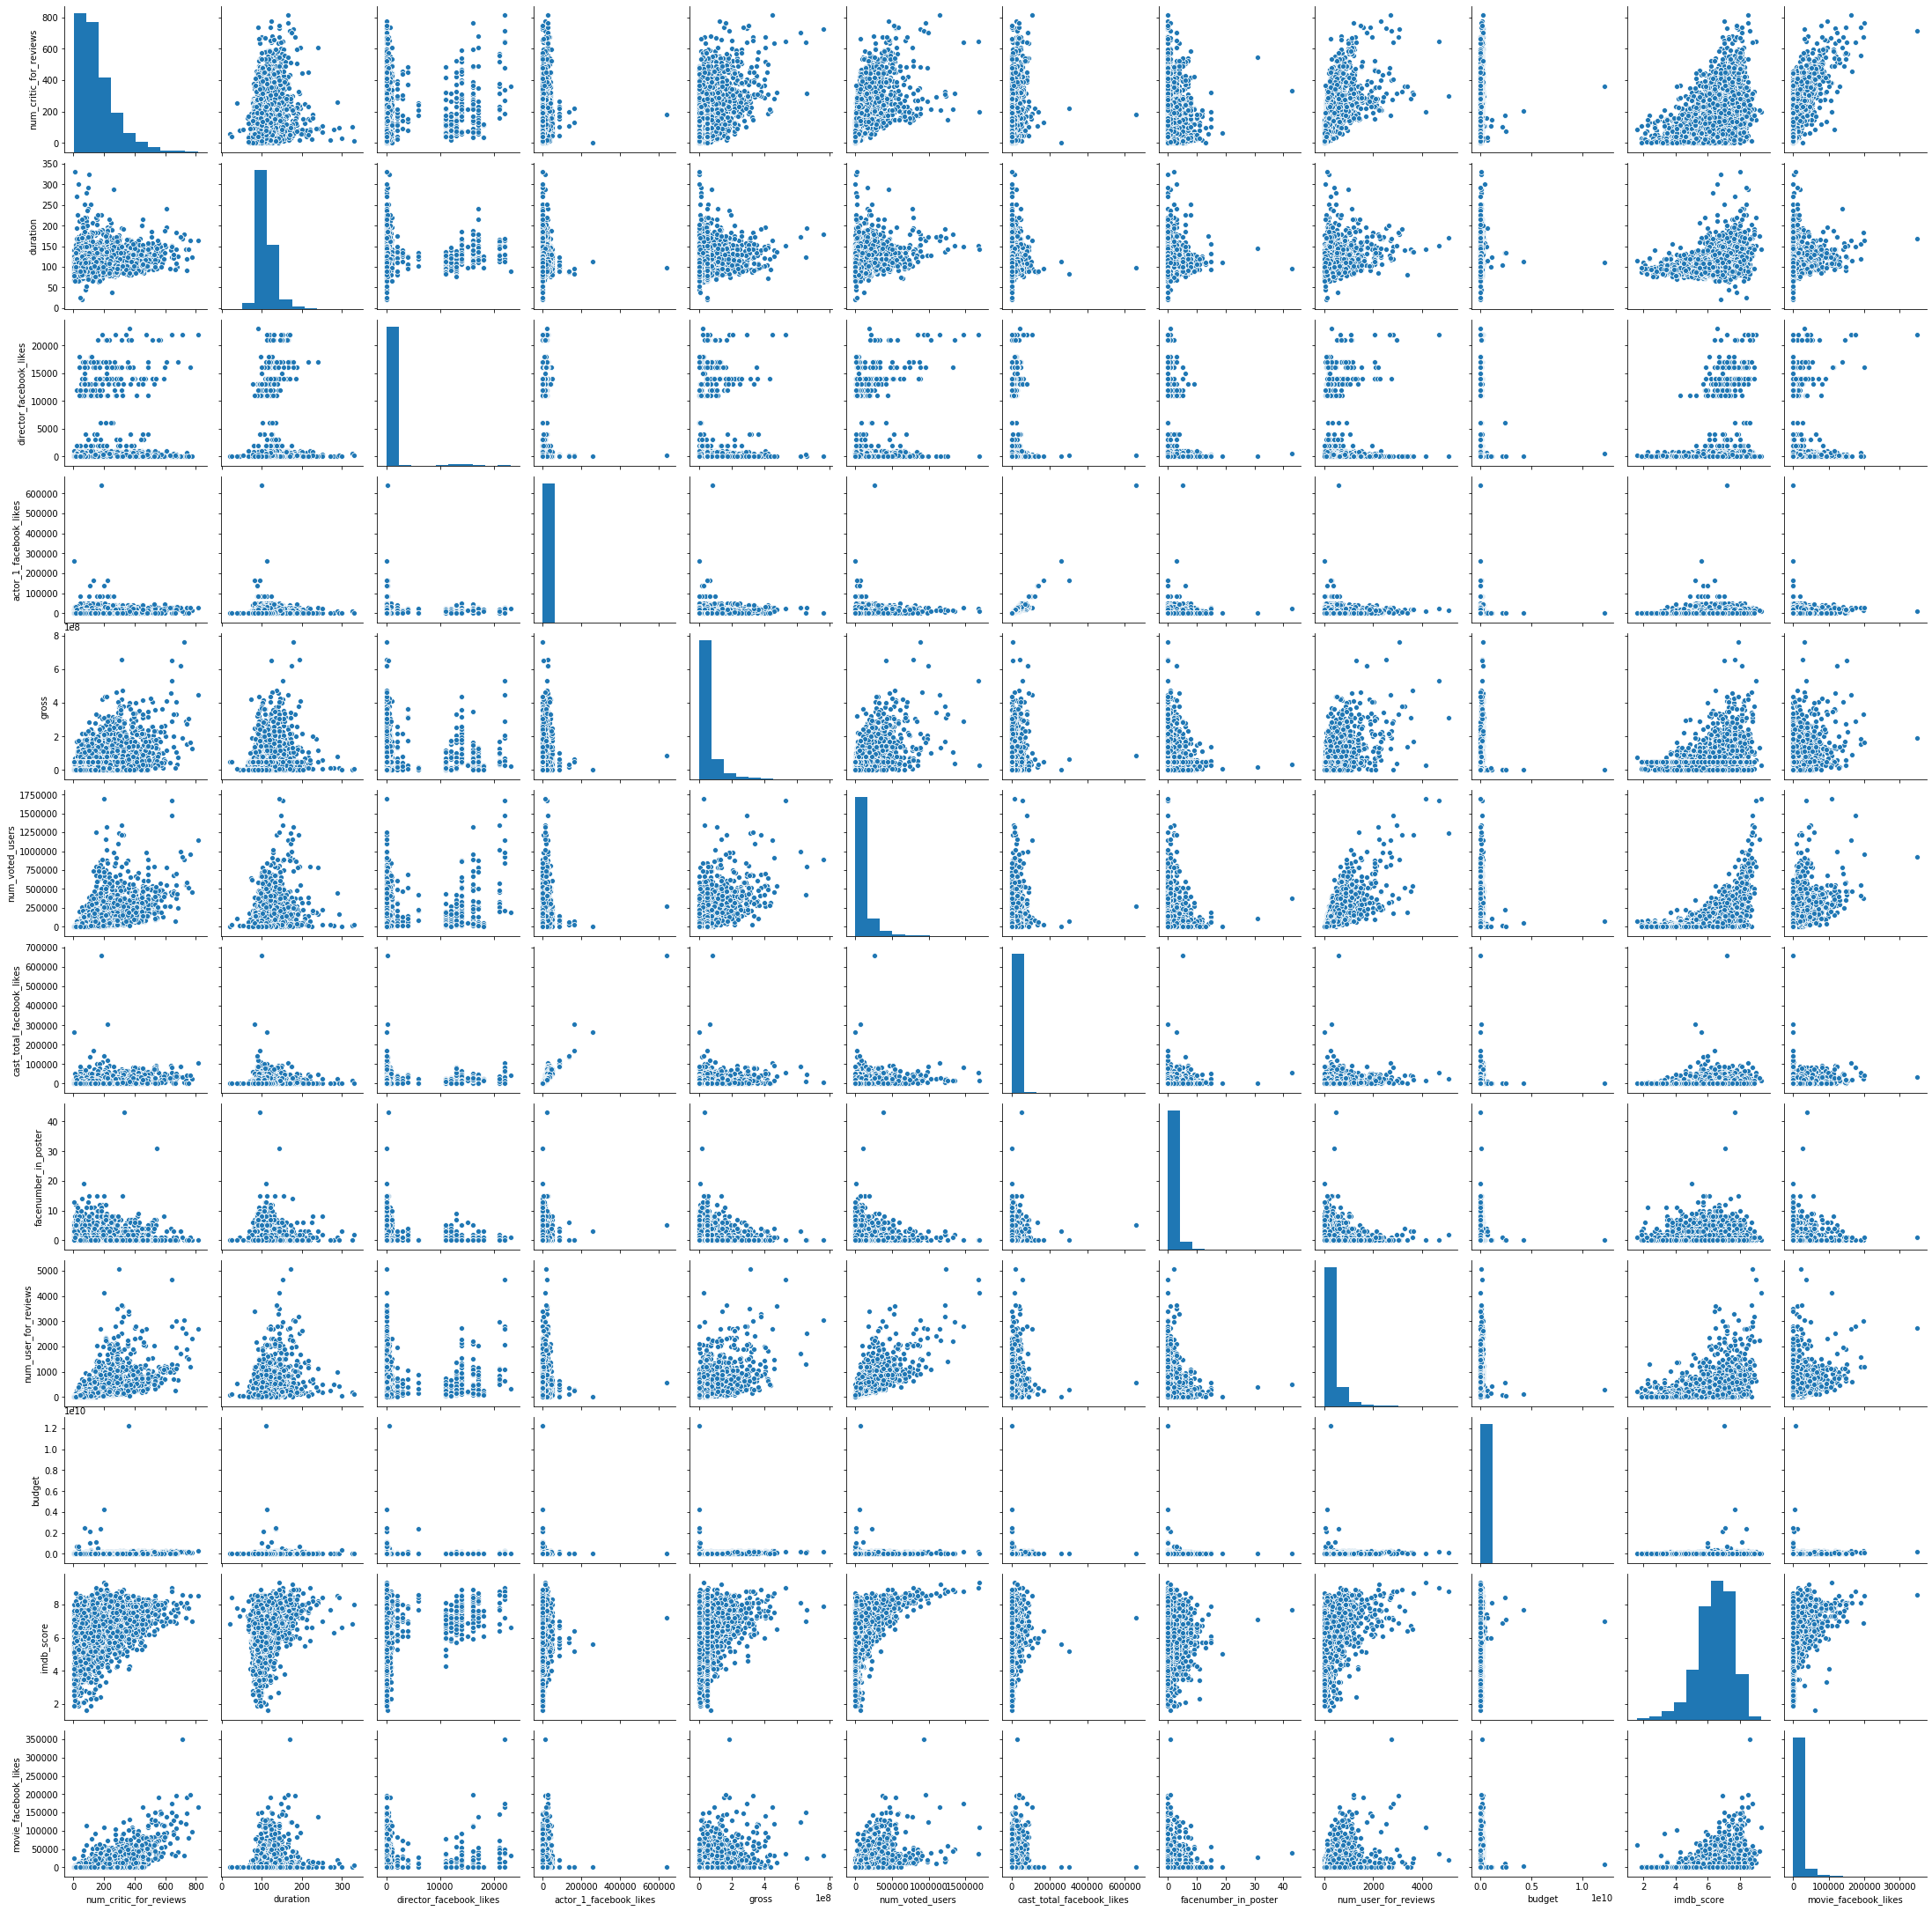

In [390]:
g = sns.pairplot(frame)

In [418]:
df_1.groupby('movie_title',as_index=False)[['gross','imdb_score']].sum()

,movie_title,gross,imdb_score
0,10 Cloverfield Lane,7.189722e+07,7.3
1,10 Days in a Madhouse,1.461600e+04,7.5
2,10 Things I Hate About You,3.817611e+07,7.2
3,102 Dalmatians,6.694156e+07,4.8
4,10th & Wolf,5.348100e+04,6.4
...,...,...,...
4334,[Rec],4.846841e+07,7.5
4335,eXistenZ,2.840417e+06,6.8
4336,xXx: State of the Union,2.608291e+07,4.3
4337,xXx,1.412040e+08,5.8


In [422]:
df_1.groupby('movie_title',as_index=False).agg({'gross':'sum'}).sort_values('gross', ascending=False).head(20)

,movie_title,gross
3103,The Avengers,1.246559e+09
332,Avatar,7.605058e+08
3487,The Jungle Book,7.252903e+08
2877,Spider-Man 3,6.730606e+08
191,Alice in Wonderland,6.683704e+08
3991,Titanic,6.586723e+08
1764,King Kong,6.541538e+08
1728,Jurassic World,6.521773e+08
2795,Skyfall,6.087206e+08
3875,The Twilight Saga: Breaking Dawn - Part 2,5.845978e+08


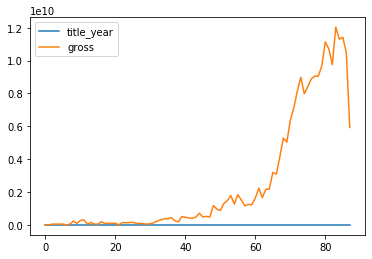

In [423]:
df_1.groupby('title_year',as_index=False).agg({'gross':'sum'}).plot()

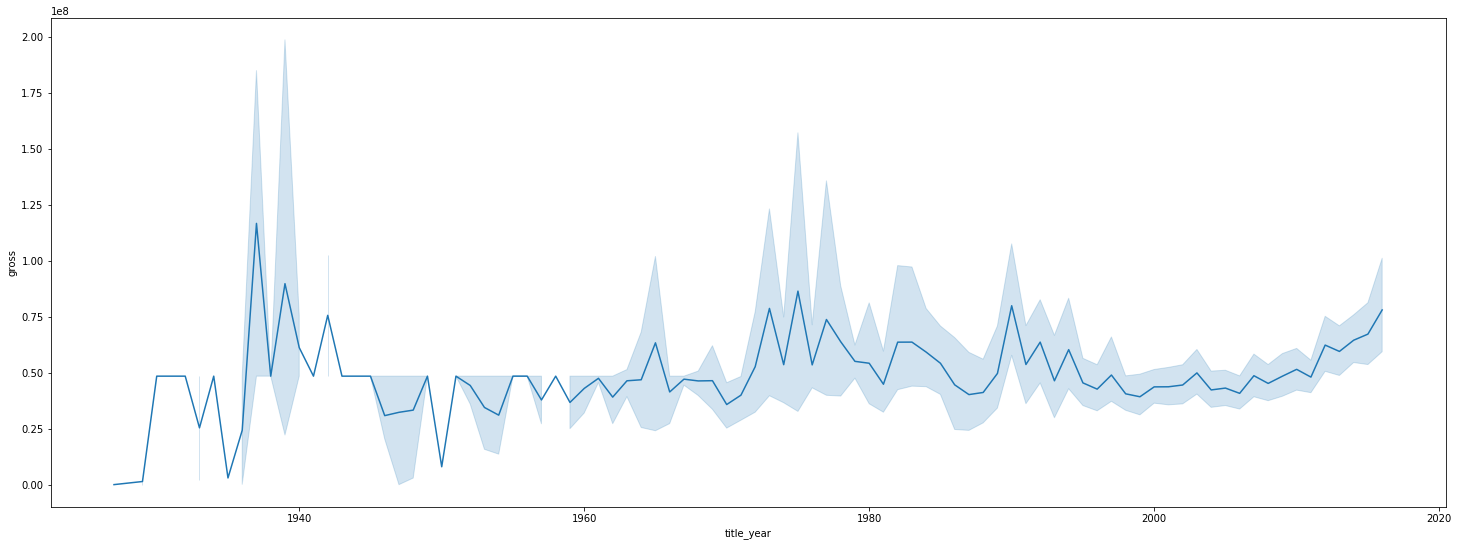

In [431]:
plt.figure(figsize=(25,9))
sns.lineplot(x=df_1.title_year, y=df_1.gross)

In [433]:
df_1.groupby('country',as_index=False).agg({'gross':'sum'}).sort_values('gross', ascending=False).head(20)

,country,gross
53,USA,1.919777e+11
52,UK,1.426552e+10
8,Canada,3.117563e+09
19,Germany,2.799975e+09
17,France,2.655193e+09
3,Australia,2.172615e+09
36,New Zealand,1.395097e+09
30,Japan,7.156747e+08
47,Spain,4.720915e+08
10,China,4.125974e+08


In [432]:
df_1

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,genres_1,genres_2,genres_3
0,723.0,178.0,0.0,1000.0,760505847.0,Avatar,886204,4834,0.0,3054.0,...,USA,PG-13,237000000.0,2009.0,7.9,1.78,33000,Action,Adventure,Fantasy
1,302.0,169.0,563.0,40000.0,309404152.0,Pirates of the Caribbean: At World's End,471220,48350,0.0,1238.0,...,USA,PG-13,300000000.0,2007.0,7.1,2.35,0,Action,Adventure,Fantasy
2,602.0,148.0,0.0,11000.0,200074175.0,Spectre,275868,11700,1.0,994.0,...,UK,PG-13,245000000.0,2015.0,6.8,2.35,85000,Action,Adventure,Thriller
3,813.0,164.0,22000.0,27000.0,448130642.0,The Dark Knight Rises,1144337,106759,0.0,2701.0,...,USA,PG-13,250000000.0,2012.0,8.5,2.35,164000,Action,Thriller,None
5,462.0,132.0,475.0,640.0,73058679.0,John Carter,212204,1873,1.0,738.0,...,USA,PG-13,263700000.0,2012.0,6.6,2.35,24000,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,64.0,90.0,397.0,5.0,673780.0,The Circle,4555,5,0.0,26.0,...,Iran,Not Rated,10000.0,2000.0,7.5,1.85,697,Drama,None,None
5033,143.0,77.0,291.0,291.0,424760.0,Primer,72639,368,0.0,371.0,...,USA,PG-13,7000.0,2004.0,7.0,1.85,19000,Drama,Sci-Fi,Thriller
5035,56.0,81.0,0.0,121.0,2040920.0,El Mariachi,52055,147,0.0,130.0,...,USA,R,7000.0,1992.0,6.9,1.37,0,Action,Crime,Drama
5041,14.0,100.0,0.0,946.0,10443.0,Shanghai Calling,1255,2386,5.0,9.0,...,USA,PG-13,0.0,2012.0,6.3,2.35,660,Comedy,Drama,Romance
